# Predicting Credit Card Defaults
Carter Bouley & Zaria Rankine

## Contents

- [Introduction](#intro)
- [Data Loading and Exploration](#eda)
- [Baseline Model](#base)
- [Logistic Regression](#log)
- [Support Vector Classifier](#svc)
- [K Nearest Neighbors](#knn)
- [Random Forrest](#rf)
- [Bagged Decision Tree](#bag)

# <a id='intro'> Introduction</a>



In [60]:
import models as md
import cleaning as cn
import visuals as vs

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler



from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 90)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <a id='eda'> Data Loading and Exploration</a>

In [61]:
df = pd.read_csv('credit_messy.csv')
df_d = pd.read_csv('allthedummies.csv') #DF with Dummy Variables

In [62]:
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = md.XySplit(df)

In [63]:
md.stats(df)

Average Credit Limit: $ 167484.32
Average Chance of Default:  22.12 %


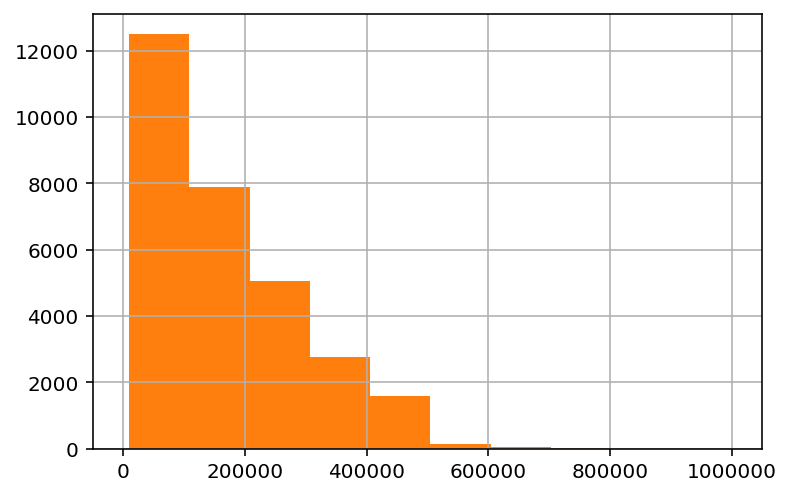

In [64]:
vs.hists(df,'Age'),
vs.hists(df, 'CreditLimit')

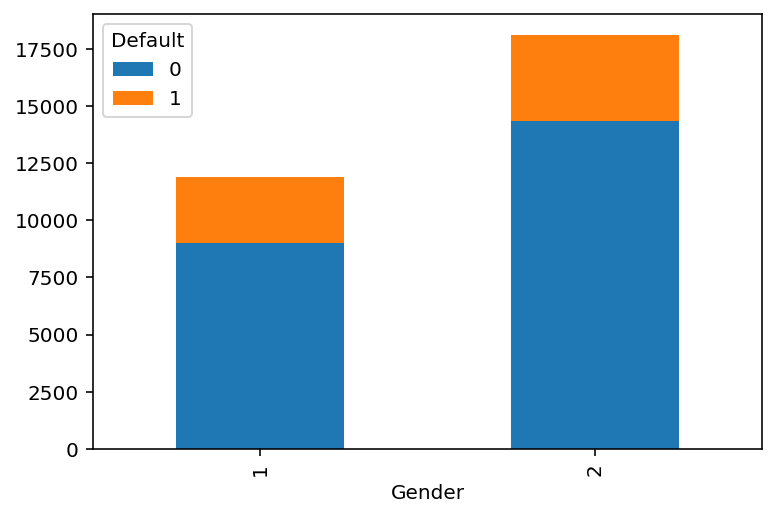

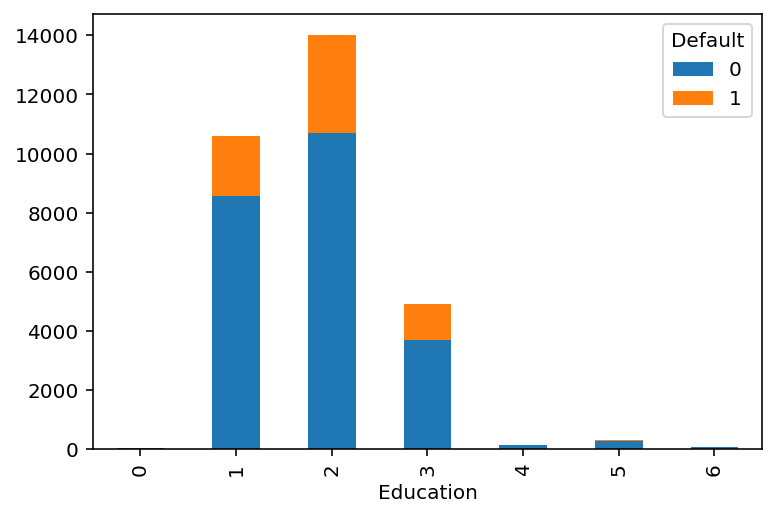

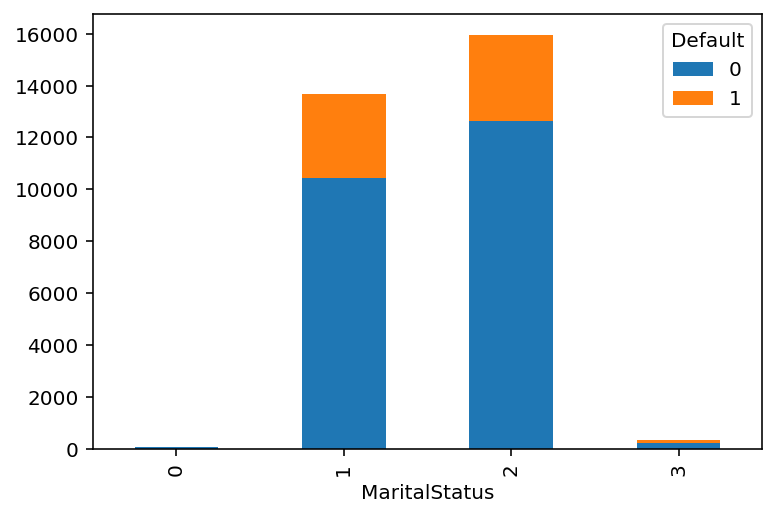

In [65]:
vs.bars(df,'Gender')
vs.bars(df,'Education')
vs.bars(df,'MaritalStatus')

# <a id='eda'> Baseline Model</a> 

We built a basic Decision Tree as our baseline model.

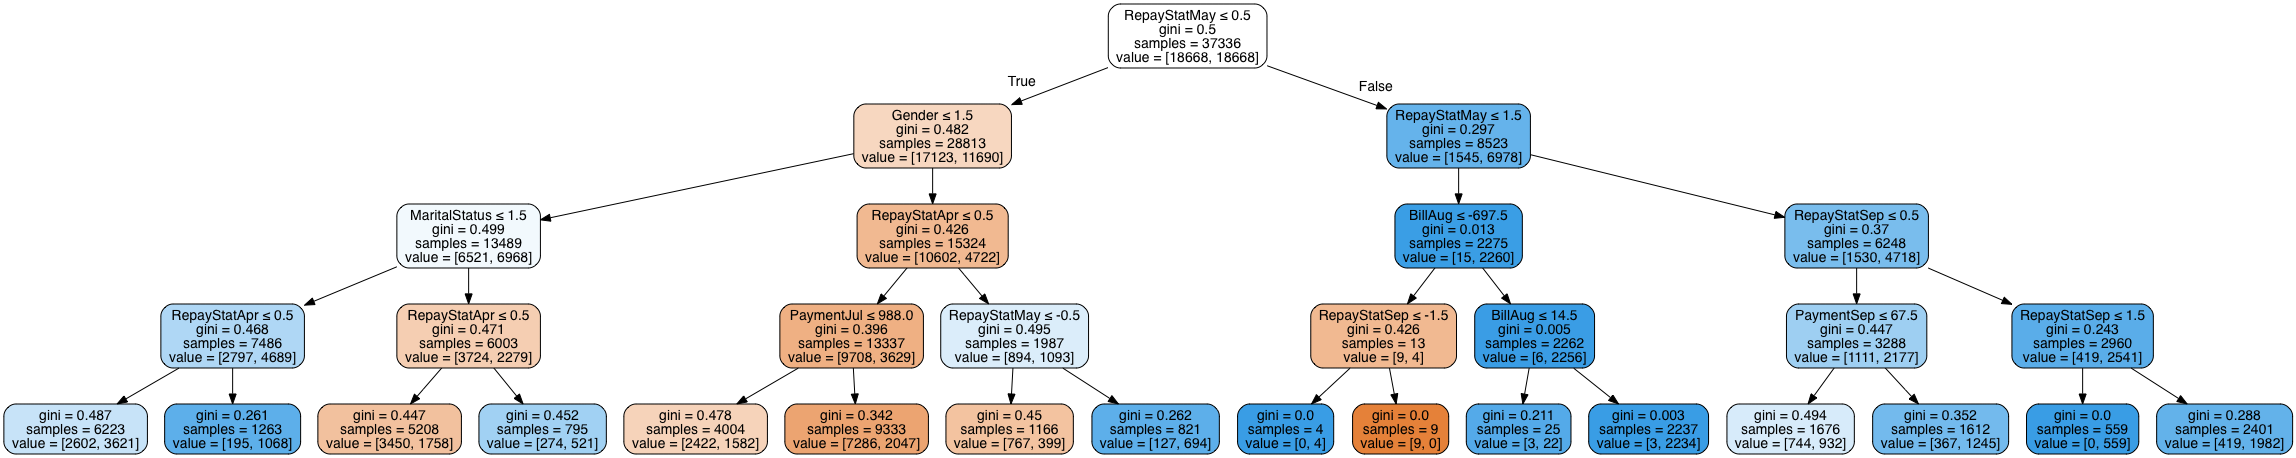

In [10]:
vs.PlotDecisionTree(X_train, X_test, y_train, y_test)

Training Accuracy for Decision Tree Classifier: 100.0%
Testing Accuracy for Decision Tree Classifier: 71.25%


Confusion Matrix 

Predicted     0     1   All
True                       
0          3463  1233  4696
1          1467  3229  4696
All        4930  4462  9392
None 

 Classification Report 

               precision    recall  f1-score   support

           0       0.70      0.74      0.72      4696
           1       0.72      0.69      0.71      4696

    accuracy                           0.71      9392
   macro avg       0.71      0.71      0.71      9392
weighted avg       0.71      0.71      0.71      9392



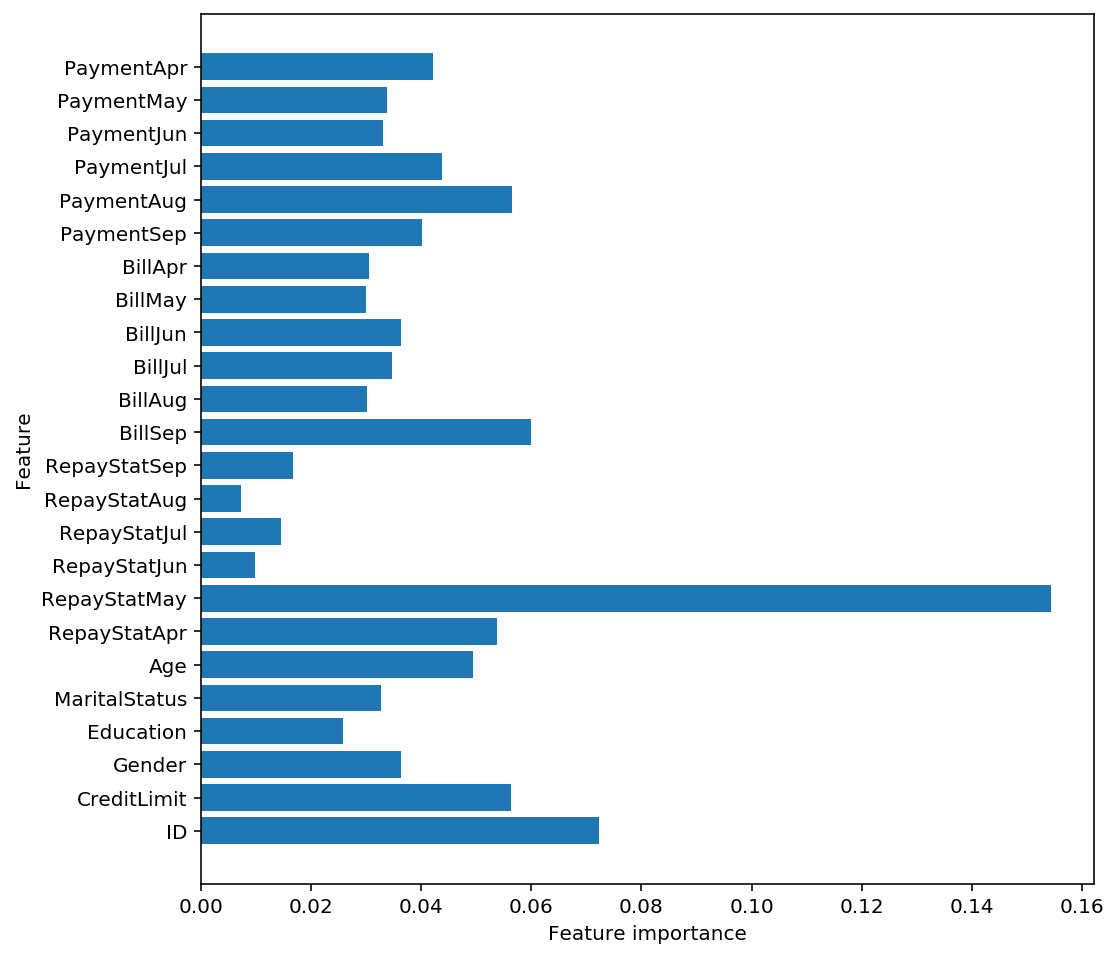

In [11]:
md.DecisionTree(X_train, X_test, y_train, y_test)

---------
AUC Score: 0.6152671376762368
---------


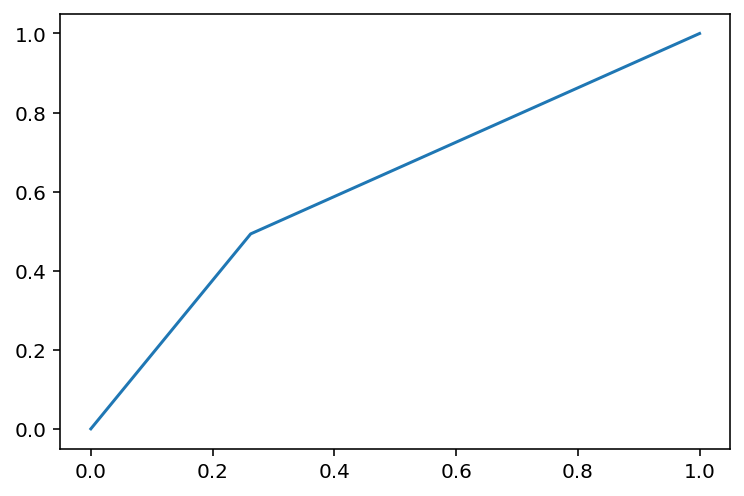

In [66]:
vs.PlotRocCurve(X_train, X_test, y_train, y_test, DecisionTreeClassifier)

# <a id='log'> Logistic Regression</a>

Finally, we built a Logistic Regression Model.

We were unable to optimise for the normalization method used with Grid Search, as some methods are only compatible with specific solvers. This could have been rectified by using a pipeline to run our iterations of the model, but time contraints didn't allow for this.

We also tested various values for C, between 0.25 and 50, but they ultimately added no improvement to our model's score, and so we have ommitted the parameter from our final model.

Increasing the number of iterations did slightly improve our model - using too few iterations didn't allow for our model to converge, and using too many increased the running time without adding to performace. Ultimately, we used a maximum of * iterations, as ... 

In [24]:
md.OptimiseLogReg(X_train_scaled_d, X_test_scaled_d, y_train_d, y_test_d)

{'max_iter': 250}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.331122,0.133724,0.006930,0.001912,250,{'max_iter': 250},0.362177,0.796412,0.927124,0.918889,0.921866,0.785294,0.217148,1
1,1.303114,0.140092,0.006376,0.002137,500,{'max_iter': 500},0.362177,0.796412,0.927124,0.918889,0.921866,0.785294,0.217148,1
2,1.426858,0.123789,0.006441,0.000863,1000,{'max_iter': 1000},0.362177,0.796412,0.927124,0.918889,0.921866,0.785294,0.217148,1
3,1.544010,0.055784,0.007119,0.001850,2500,{'max_iter': 2500},0.362177,0.796412,0.927124,0.918889,0.921866,0.785294,0.217148,1


Confusion Matrix 

Predicted     0     1   All
True                       
0          3351  1345  4696
1           513   791  1304
All        3864  2136  6000
None 

 Classification Report 

               precision    recall  f1-score   support

           0       0.87      0.71      0.78      4696
           1       0.37      0.61      0.46      1304

    accuracy                           0.69      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.69      0.71      6000

Training Accuracy for Logistic Regression Classifier: 72.17%
Testing Accuracy for Logistic Regression Classifier: 69.03%


---------
AUC Score: 0.7069845044993259
---------


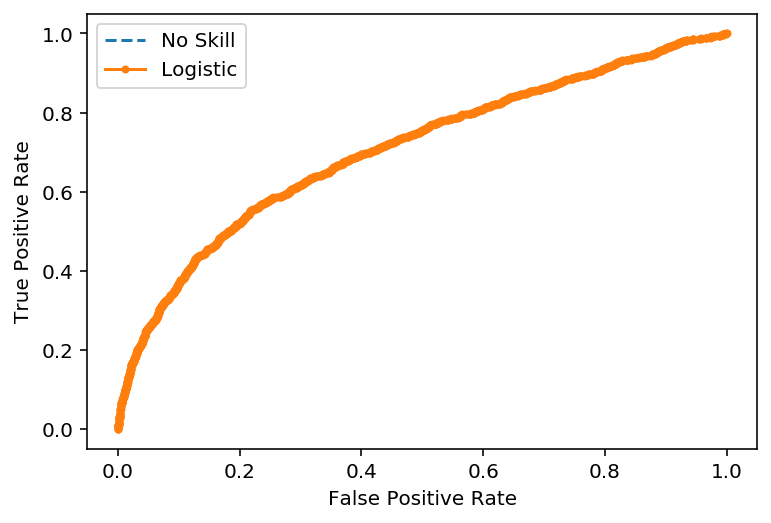

In [69]:
md.LogRegression(X_train_scaled, X_test_scaled, y_train, y_test, max_iter_ = 250)

In [70]:
md.Logfeatureimportance(X_train_scaled, X_test_scaled, y_train, y_test)

AttributeError: module 'models' has no attribute 'Logfeatureimportance'

In [ ]:
feature_importance=pd.DataFrame(np.hstack((np.array([X_test.columns[:]]).T, log_reg_clf.coef_.T)), columns=['feature', 'importance'])
mean = feature_importance.importance.mean()
std = feature_importance.importance.std()
coef_lista = []
for row in feature_importance.importance:
    new_calc = ((row - mean)/(std))
    coef_lista.append(new_calc)
    
feature_importance['coef_importance_scaled'] = coef_lista
importances = feature_importance.reindex(feature_importance.coef_importance_scaled.abs().sort_values(ascending = False).index)
importances

# <a id='intro'> Support Vector Machine</a>


Following the result of the Logistic Regression we decided to look into SVM classifier to see if it would provide a better result
The grid search is highly computationally intensive so selecting the best model parameters may prove difficult.
In fact we were unable to perform it effectively enough to garner a significant result - as seen in the AUC curve. 

This may end up being a useful model however these computational restraints limit its effectiveness.
The whole point of this excersise is to provide a model which can make the banks decision easier, and adds efficiency to their business, not take up extra resources.

Given that the model will need to be retrained regularly with new data if operationalized, we have taken the decision to not recommend this model, as by limiting the grid search, it provides a poor score.

In [58]:
X_train_d, X_test_d, y_train_d, y_test_d, X_train_scaled_d, X_test_scaled_d = md.XySplit(df_d)

In [ ]:
# md.svm_grid_searched(X_train_scaled, X_test_scaled, y_train, y_test)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.80      0.92      0.85      4537
           1       0.28      0.12      0.17      1212

    accuracy                           0.75      5749
   macro avg       0.54      0.52      0.51      5749
weighted avg       0.69      0.75      0.71      5749

Confusion Matrix 

Predicted     0    1   All
True                      
0          4171  366  4537
1          1069  143  1212
All        5240  509  5749
None 

 Classification Report 

               precision    recall  f1-score   support

           0       0.80      0.92      0.85      4537
           1       0.28      0.12      0.17      1212

    accuracy                           0.75      5749
   macro avg       0.54      0.52      0.51      5749
weighted avg       0.69      0.75      0.71      5749

---------
AUC Score: 0.5314863451299946
---------


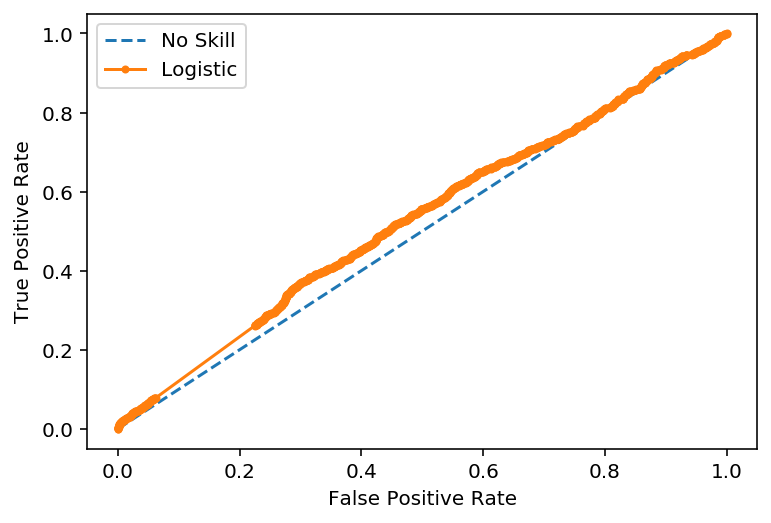

In [51]:
md.SVM(X_train_scaled_d, X_test_scaled_d, y_train_d, y_test_d)

# <a id='knn'> K Nearest Neighbors</a>

Similarly, our KNN model didn't perform as well as we had hoped. Using Grid Search wasn't particularly helpful, as the parameters it found optimal didn't generalise very well for the testing data, and we didn't feel confident it would generalise well once deployed on new data. 

For this reason, we would not recommend this model being used.

In [73]:
md.OptimiseKNN(X_train, X_test, y_train, y_test)

{'leaf_size': 5, 'n_neighbors': 9}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.117800,0.003086,2.365532,0.179383,10,9,"{'leaf_size': 10, 'n_neighbors': 9}",0.706305,0.73948,0.761596,0.775087,0.754761,0.747446,0.023553,1
1,0.160546,0.044506,2.928956,0.429083,5,9,"{'leaf_size': 5, 'n_neighbors': 9}",0.706305,0.73948,0.761596,0.775087,0.754761,0.747446,0.023553,1
43,0.101388,0.004108,2.127623,0.143133,35,9,"{'leaf_size': 35, 'n_neighbors': 9}",0.706305,0.73948,0.761596,0.775087,0.754761,0.747446,0.023553,1
22,0.109976,0.006603,2.253171,0.208932,20,9,"{'leaf_size': 20, 'n_neighbors': 9}",0.706305,0.73948,0.761596,0.775087,0.754761,0.747446,0.023553,1
36,0.103445,0.005960,2.382594,0.266696,30,9,"{'leaf_size': 30, 'n_neighbors': 9}",0.706305,0.73948,0.761596,0.775087,0.754761,0.747446,0.023553,1
29,0.107407,0.007033,2.207285,0.214953,25,9,"{'leaf_size': 25, 'n_neighbors': 9}",0.706305,0.73948,0.761596,0.775087,0.754761,0.747446,0.023553,1


Confusion Matrix 

Predicted     0     1   All
True                       
0          2699  1997  4696
1           549   755  1304
All        3248  2752  6000
None 

 Classification Report 

               precision    recall  f1-score   support

           0       0.83      0.57      0.68      4696
           1       0.27      0.58      0.37      1304

    accuracy                           0.58      6000
   macro avg       0.55      0.58      0.53      6000
weighted avg       0.71      0.58      0.61      6000

Training Accuracy for KNN Classifier: 78.59%
Testing Accuracy for KNN Classifier: 57.57%


---------
AUC Score: 0.6137153503569152
---------


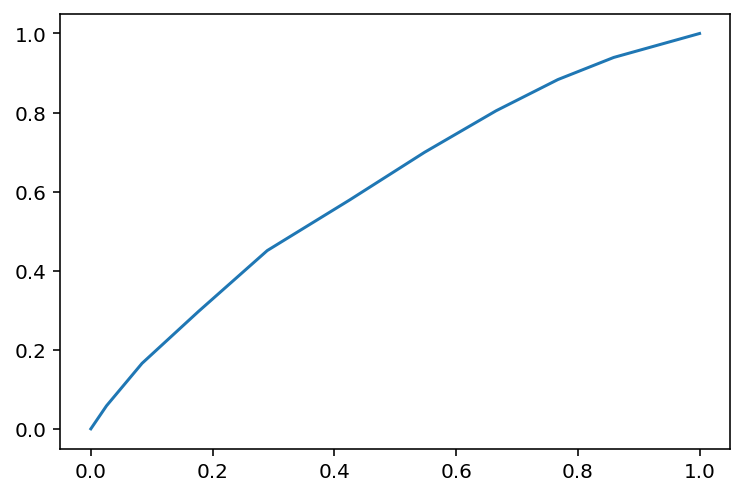

In [75]:
md.KNN(X_train, X_test, y_train, y_test, n_neighbors_=9, leaf_size_=5)

# <a id='rf'>Random Forest</a> 
We next built a Random Forest, and optimised the model using the maxiumum tree depth, a maximum number of features and the number of estimators used.  We iterated through these, using both Gini and Entropy selection criteria, although we ultimately settled on using Gini.

In [29]:
md.OptimiseForest(X_train, X_test, y_train, y_test)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 11, 'n_estimators': 12}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
62,2.123171,0.158382,0.028960,0.002343,gini,11,11,12,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.595261,0.755824,0.831120,0.831957,0.828261,0.768485,0.091315,1
51,1.210514,0.050749,0.032165,0.003948,gini,11,5,14,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.609909,0.755067,0.825156,0.825216,0.822712,0.767612,0.083299,2
63,2.411157,0.109904,0.028308,0.004088,gini,11,11,14,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.589364,0.756237,0.830889,0.833156,0.828399,0.767609,0.093698,3
61,1.654790,0.073032,0.019743,0.001806,gini,11,11,10,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.595006,0.754028,0.830806,0.830380,0.826838,0.767412,0.091014,4
55,1.502449,0.070147,0.026809,0.004118,gini,11,7,14,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.601487,0.755856,0.820250,0.834206,0.825214,0.767403,0.087475,5
50,1.003537,0.060635,0.025296,0.002073,gini,11,5,12,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.608097,0.753818,0.823945,0.826081,0.822353,0.766859,0.083930,6


Confusion Matrix 

Predicted     0     1   All
True                       
0          3864   832  4696
1           565   739  1304
All        4429  1571  6000
None 

 Classification Report 

               precision    recall  f1-score   support

           0       0.87      0.82      0.85      4696
           1       0.47      0.57      0.51      1304

    accuracy                           0.77      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.79      0.77      0.77      6000

Training Accuracy for Random Forest Classifier 74.33%
Testing Accuracy for Random Forest Classifier: 76.72%


---------
AUC Score: 0.7571989704068728
---------


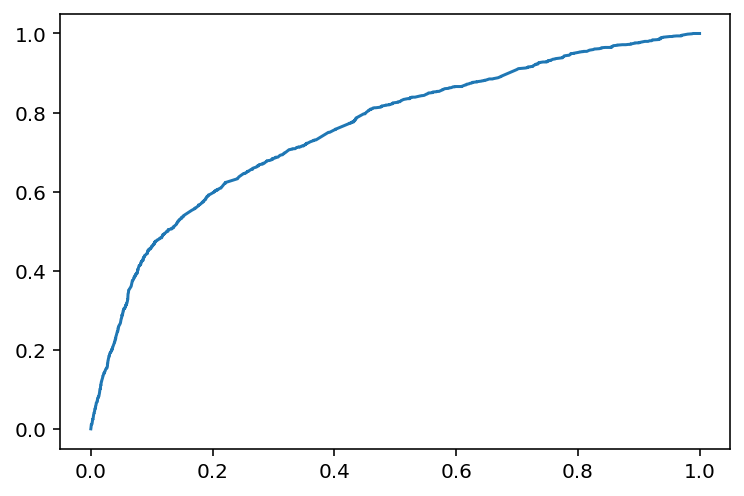

In [74]:
md.RandomForest(X_train, X_test, y_train, y_test, criterion_ = 'gini', 
                max_depth_ = 5, max_features_ = 5, n_estimators_ = 5)

84 77

# <a id='bag'>Bagged Tree</a> # 

After building a Random Forrest Model, we decided to build a Bagged Decision tree. They use similar methods, except in Random forests, only a subset of features are selected at random out of the total, whereas bagging allows for all features to be considered for the best split.

We then optimised our Baseline Bagged Model, using Grid Search to find optimal parameters. We ran various iterations of the learner, with different values for * .

Our Grid Search showed that increasing the number of features would improve our model
but we decided that * would be the maximum number of features we would use, as to avoid overfitting. 

We then input the most effective parameters for our final Bagged Decision Tree Model. 

In [17]:
md.OptimiseBagging(X_train, X_test, y_train, y_test)

{'max_features': 18, 'n_estimators': 11}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
34,3.950370,0.151195,0.040654,0.002510,18,11,"{'max_features': 18, 'n_estimators': 11}",0.634880,0.783671,0.870263,0.873826,0.869700,0.806468,0.092269,1
10,3.021765,0.098825,0.038225,0.004162,14,11,"{'max_features': 14, 'n_estimators': 11}",0.630997,0.794739,0.869576,0.869003,0.864214,0.805706,0.091818,2
16,3.219028,0.079097,0.037517,0.002445,15,11,"{'max_features': 15, 'n_estimators': 11}",0.619226,0.796041,0.870658,0.878683,0.862171,0.805356,0.097571,3
22,3.489846,0.189566,0.041408,0.002234,16,11,"{'max_features': 16, 'n_estimators': 11}",0.627649,0.792934,0.867739,0.873239,0.864335,0.805179,0.093501,4
28,3.673684,0.133501,0.037145,0.002096,17,11,"{'max_features': 17, 'n_estimators': 11}",0.624023,0.791203,0.869880,0.872629,0.863263,0.804200,0.094992,5
32,3.178593,0.110385,0.034143,0.003546,18,9,"{'max_features': 18, 'n_estimators': 9}",0.630062,0.791736,0.863782,0.865594,0.861043,0.802444,0.090570,6


Confusion Matrix 

Predicted     0     1   All
True                       
0          3925   771  4696
1          1331  3365  4696
All        5256  4136  9392
None 

 Classification Report 

               precision    recall  f1-score   support

           0       0.75      0.84      0.79      4696
           1       0.81      0.72      0.76      4696

    accuracy                           0.78      9392
   macro avg       0.78      0.78      0.78      9392
weighted avg       0.78      0.78      0.78      9392

Training Accuracy for Bagging Tree Classifier: 99.53%
Testing Accuracy for Bagging Tree Classifier: 77.62%


---------
AUC Score: 0.8475980590970169
---------


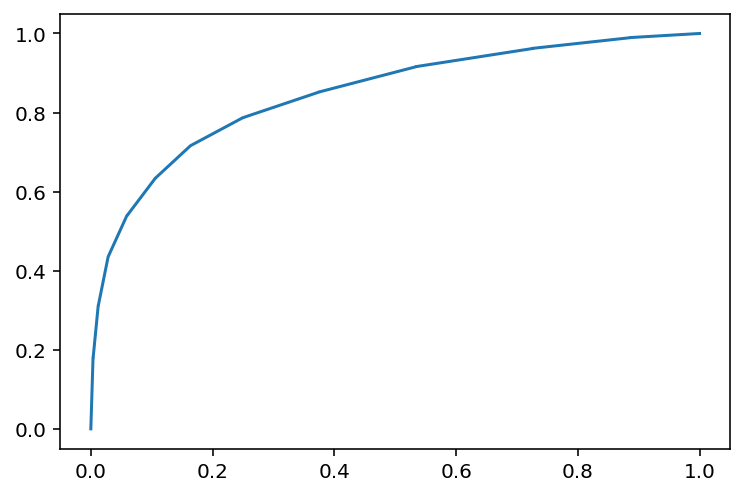

In [27]:
md.BaggedTree(X_train, X_test, y_train, y_test, n_estimators_ = 11, max_features_ = 18)